# $\text{AR}(1)$ with Offset

$\text{AR}(1)$ with a constant offset is defined by,

$
\begin{align}
X_t = \varphi X_{t-1} + \mu^* + \sigma \varepsilon_t
\end{align}
$

where, $\varepsilon \sim \text{Normal}(0,1)$

The stationarity requires $\lvert \varphi \rvert < 1$. The stationary mean and variance are given by,

$
\begin{align}
&\lim_{t \to \infty} \text{E}(X_t) = \frac{\mu^*}{1 - \varphi} \\
&\lim_{t \to \infty} \text{Var}(X_t) = \frac{\sigma^2}{1 - \varphi^2}
\end{align}
$

It follows that $X_t$ has distribution,

$
\begin{align}
X_t \sim \text{Normal}\left(  \frac{\mu}{1 - \varphi} ,  \frac{\sigma^2}{1 - \varphi^2} \right)
\end{align}
$


## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib.models import arima
from lib.data.func import (DataFunc)
from lib.data.schema import (DataType)
from lib.plots.data import (DataPlotType, stack, curve)
from lib.plots.func import (FuncPlotType, fcompare)
from lib.plots.cumu import (CumuPlotType, cumulative)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
σ = 1.0
nsample = 1000

def plot_labels_φ(φ):
    return [f"φ={val}" for val in φ]

def plot_labels_μ(μ):
    return [r"$μ^*=$" + f"{val}" for val in μ]

def ar1_series_φ(φ_vals, μ):
    series = []
    for φ in φ_vals:
        series.append(arima.arp_offset([φ], μ, nsample, σ))
    return series

def ar1_series_μ(φ, μ_vals):
    series = []
    for μ in μ_vals:
        series.append(arima.arp_offset([φ], μ, nsample, σ))
    return series

## Simulation $\varphi$ Scan

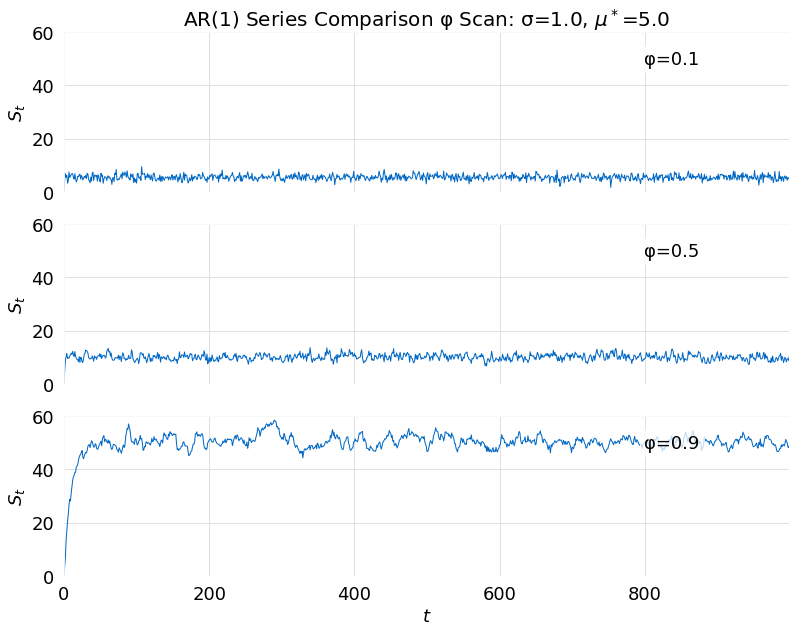

In [3]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, " + r"$μ^*$=" + f"{μ}"
φ = numpy.array([0.1, 0.5, 0.9])
labels = plot_labels_φ(φ) 
series = ar1_series_φ(φ, μ)
stack(series, ylim=[0.0, 60.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

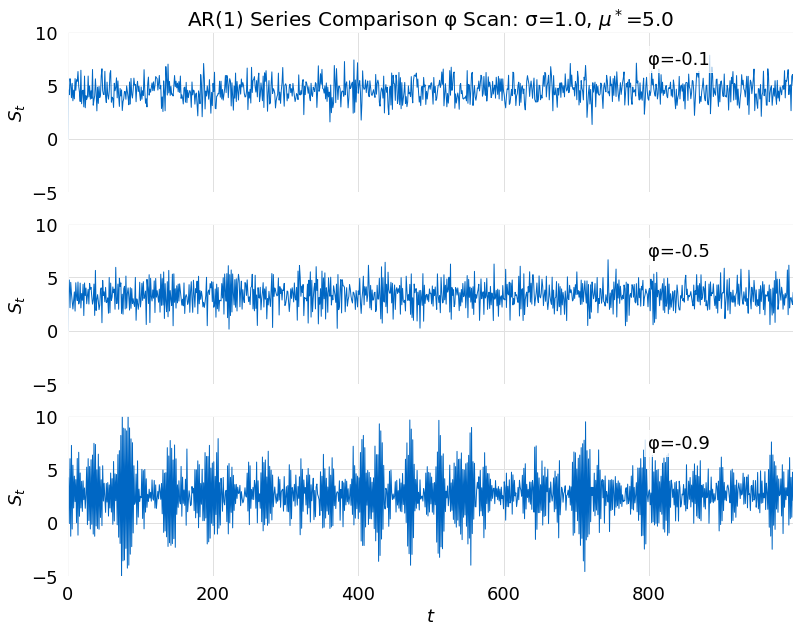

In [4]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, " + r"$μ^*$=" + f"{μ}"
φ = numpy.array([-0.1, -0.5, -0.9])
labels = plot_labels_φ(φ) 
series = ar1_series_φ(φ, μ)
stack(series, ylim=[-5.0, 10.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Simulation $\mu^*$ Scan

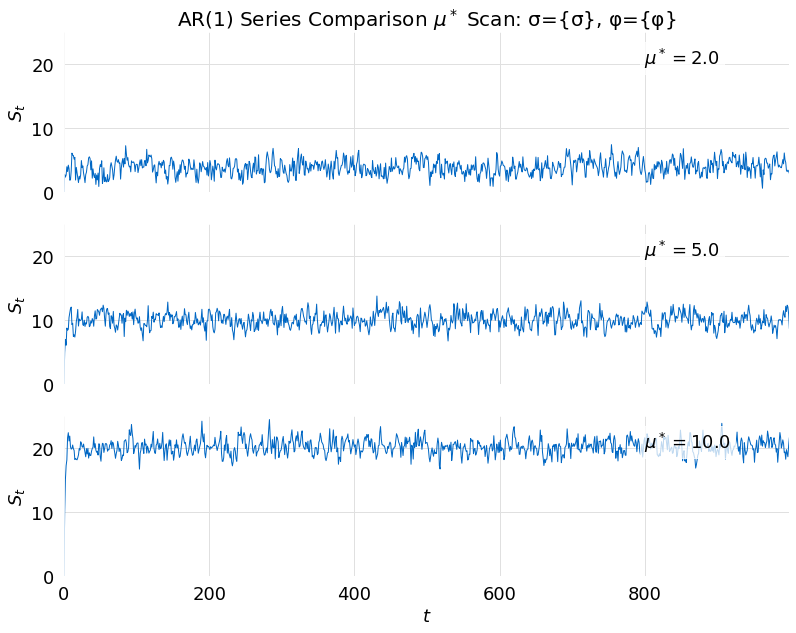

In [5]:
φ = 0.5
title = f"AR(1) Series Comparison " + r"$\mu^*$" + " Scan: σ={σ}, φ={φ}"
μ = numpy.array([2.0, 5.0, 10.0])
labels = plot_labels_μ(μ) 
series = ar1_series_μ(φ, μ)
stack(series, ylim=[0.0, 25.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

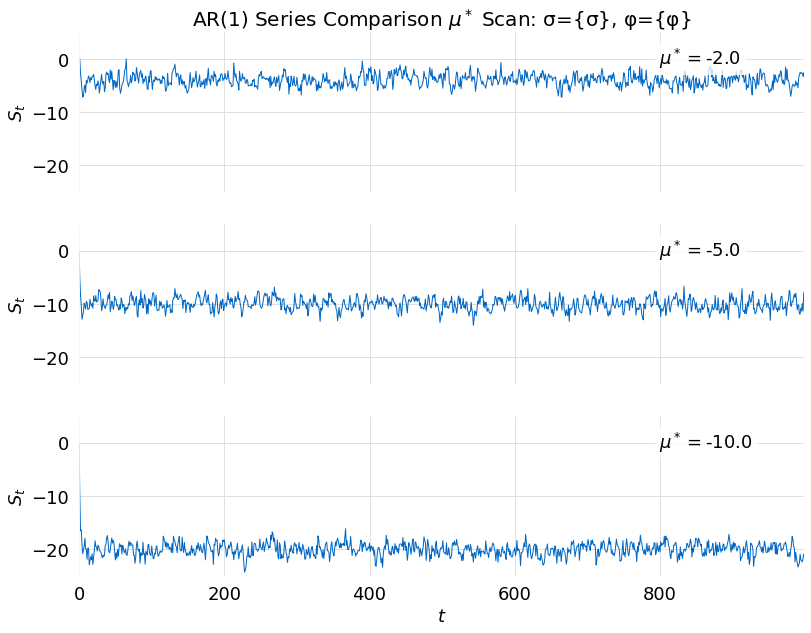

In [6]:
φ = 0.5
title = f"AR(1) Series Comparison " + r"$\mu^*$" + " Scan: σ={σ}, φ={φ}"
μ = numpy.array([-2.0, -5.0, -10.0])
labels = plot_labels_μ(μ) 
series = ar1_series_μ(φ, μ)
stack(series, ylim=[-25.0, 5.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Mean

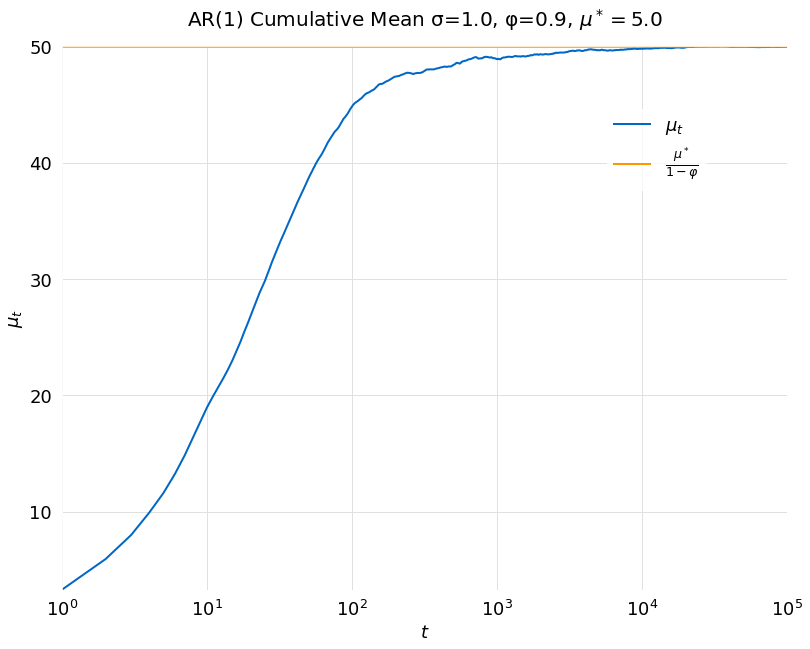

In [7]:
φ = 0.9
μ = 5.0
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_MEAN)
cumulative(data, CumuPlotType.AR1_OFFSET_MEAN, title=title, title_offset=1.025, φ=φ, μ=μ)

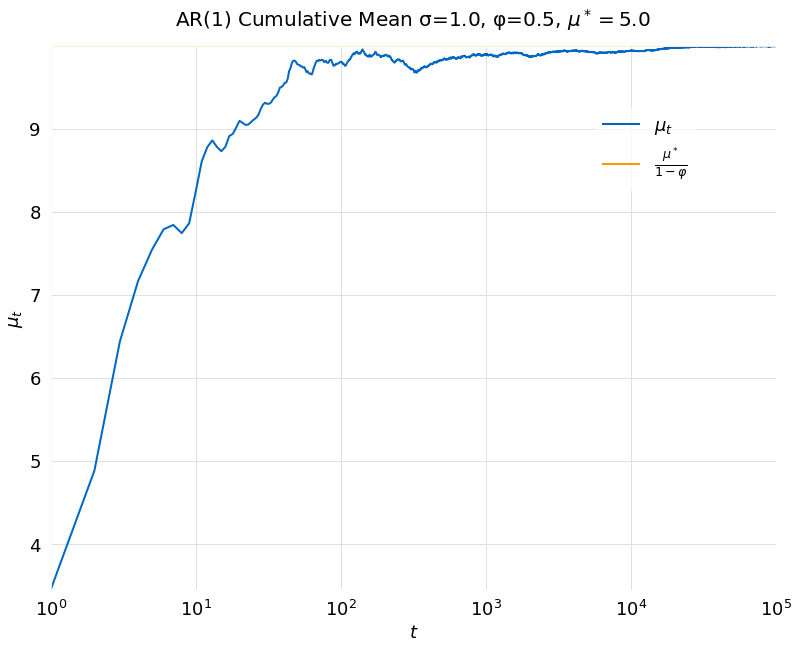

In [8]:
φ = 0.5
μ = 5.0
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_MEAN)
cumulative(data, CumuPlotType.AR1_OFFSET_MEAN, title=title, title_offset=1.025, φ=φ, μ=μ)

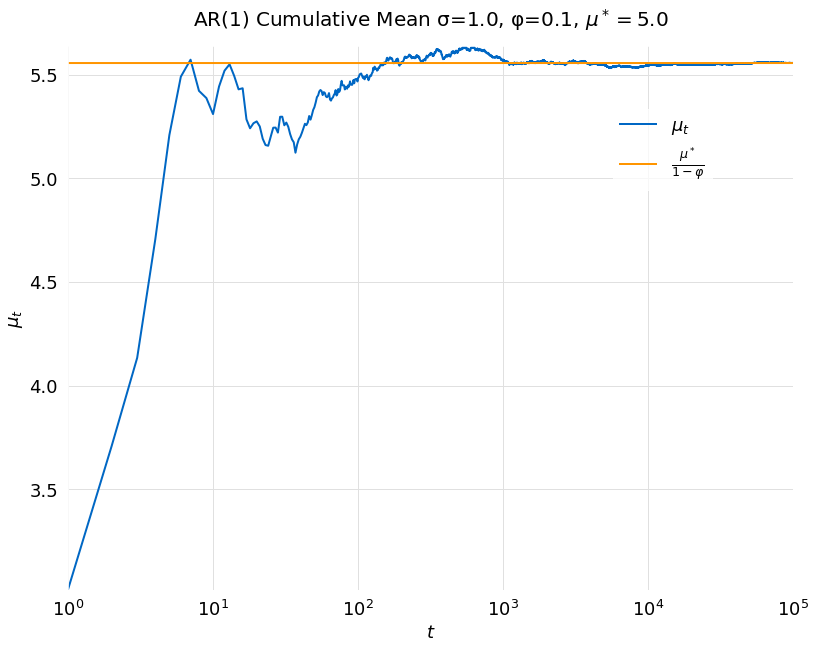

In [9]:
φ = 0.1
μ = 5.0
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_MEAN)
cumulative(data, CumuPlotType.AR1_OFFSET_MEAN, title=title, title_offset=1.025, φ=φ, μ=μ)

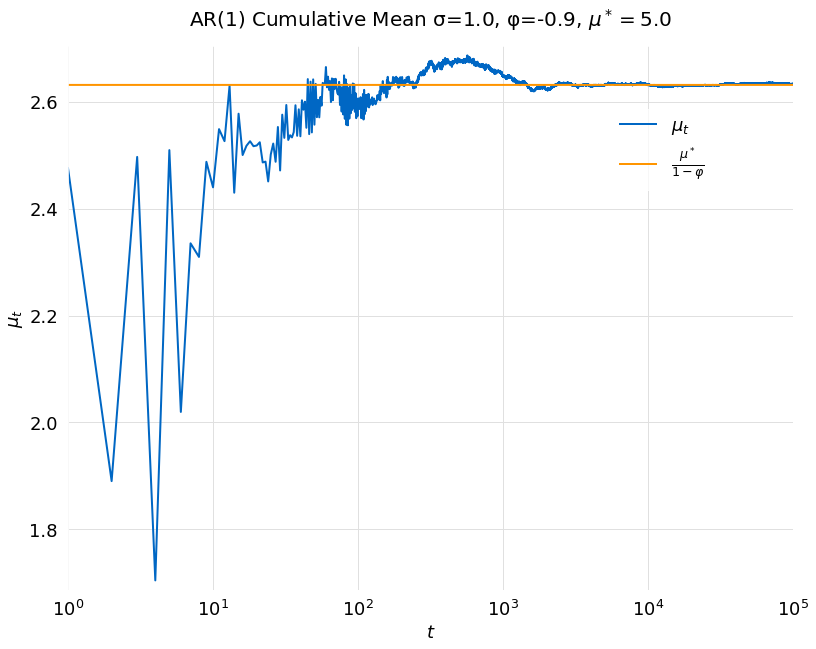

In [10]:
φ = -0.9
μ = 5.0
nsample = 100000
title = f"AR(1) Cumulative Mean σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_MEAN)
cumulative(data, CumuPlotType.AR1_OFFSET_MEAN, title=title, title_offset=1.025, φ=φ, μ=μ)

## Standard Deviation

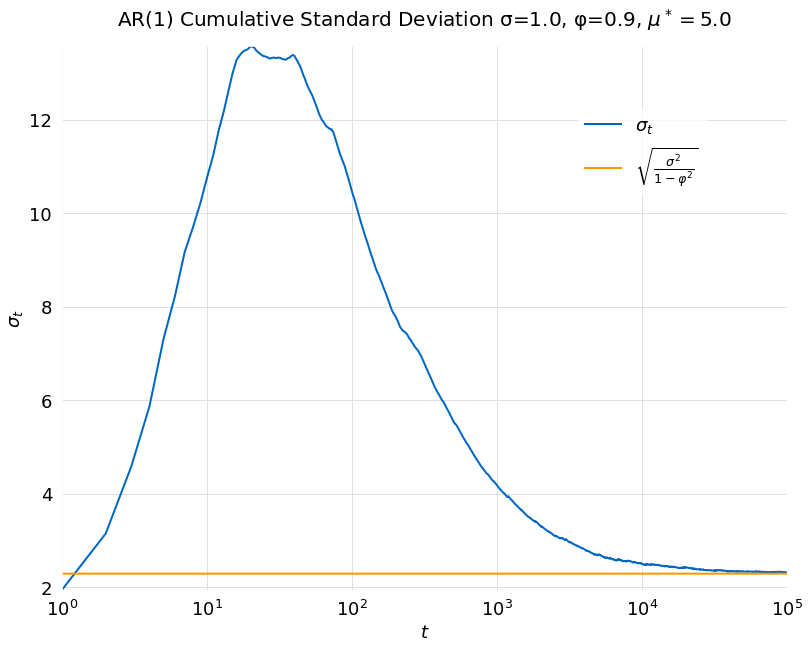

In [11]:
φ = 0.9
nsample = 100000
title = f"AR(1) Cumulative Standard Deviation σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_SD)
cumulative(data, CumuPlotType.AR1_OFFSET_SD, title=title, title_offset=1.025, φ=φ, μ=μ)

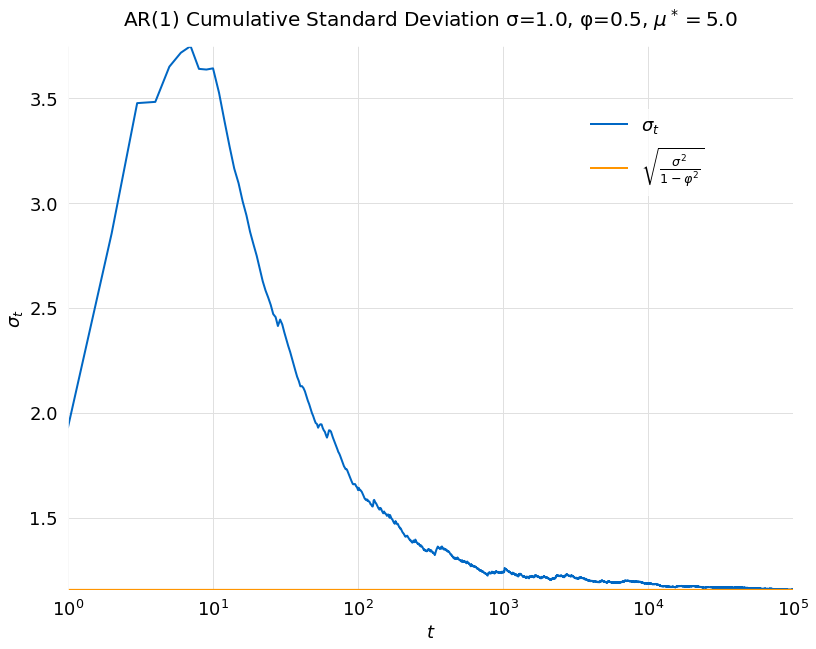

In [12]:
φ = 0.5
nsample = 100000
title = f"AR(1) Cumulative Standard Deviation σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_SD)
cumulative(data, CumuPlotType.AR1_OFFSET_SD, title=title, title_offset=1.025, φ=φ, μ=μ)

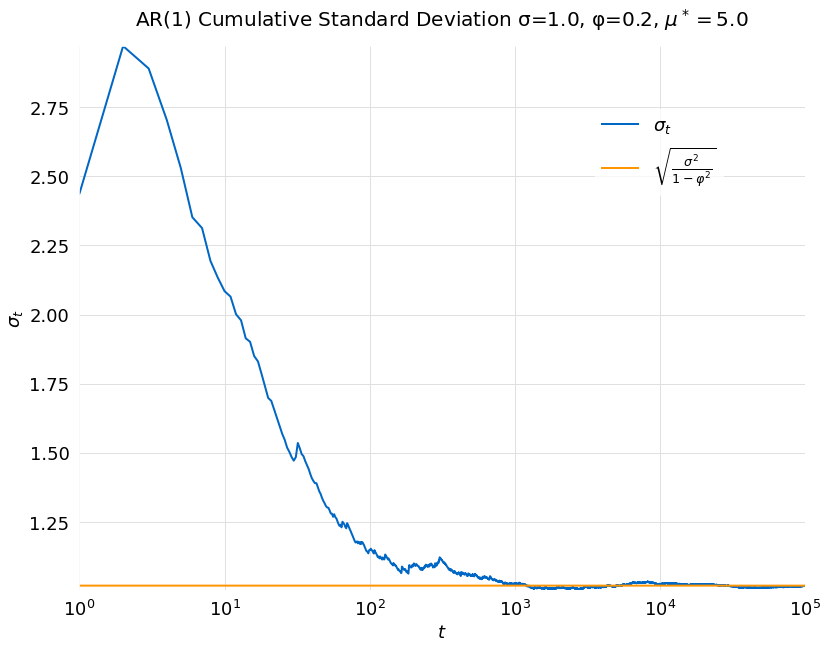

In [13]:
φ = 0.2
nsample = 100000
title = f"AR(1) Cumulative Standard Deviation σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}"
data = DataFunc.apply_func_type(arima.arp_offset([φ], μ, nsample, σ), DataType.CUMU_SD)
cumulative(data, CumuPlotType.AR1_OFFSET_SD, title=title, title_offset=1.025, φ=φ, μ=μ)

## Parameter Estimation

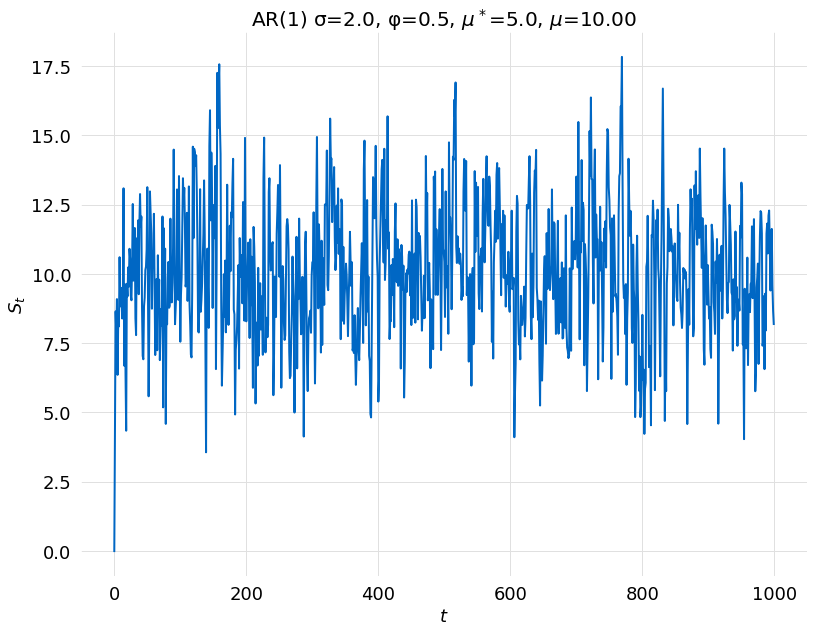

In [14]:
φ = 0.5
μ = 5.0
σ = 2.0
nsample = 1000
df = arima.arp_offset([φ], μ, nsample, σ)
title = f"AR(1) σ={σ}, φ={φ}, " + r"$\mu^*$=" + f"{μ}," + r" $\mu$=" + f"{format(μ/(1.0-φ), '4.2f')}"
curve(df, plot_type=DataPlotType.TIME_SERIES, title=title)

In [15]:
results = arima.ar_offset_fit(df, 1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2131.963
Date:                Fri, 06 May 2022   AIC                           4269.926
Time:                        07:43:05   BIC                           4284.650
Sample:                             0   HQIC                          4275.522
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0773      0.128     78.843      0.000       9.827      10.328
ar.L1          0.5031      0.026     19.248      0.000       0.452       0.554
sigma2         4.1610      0.174     23.963      0.000       3.821       4.501
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                 4.45
Prob(Q):                              0.61   Prob(JB):                         0.11
Heteroskedasticity (H):               0.79   Skew:                            -0.04
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
df.attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 2>,
  'Parameters': {'φ': [0.5], 'θ': [], 'σ': 2.0, 'μ': 5.0, 'γ': 0.0},
  'Description': 'ARIMA(1,0,0)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Estimates': {'AR(1)': {'Type': <EstType.AR: 'AR'>,
    'Const': [10.077290187511947, 0.1278139734870356],
    'Parameters': [[0.5031118509672294, 0.02613856778321273]],
    'Sigma2': [4.160971152076296, 0.17364059998103326]}},
  'Tests': {}},
 'Date': '06/05/2022 07:43:04',
 'Name': 'ARMA-Simulation-fb50564a-f3dd-4bc2-8706-a778f7d12cda'}

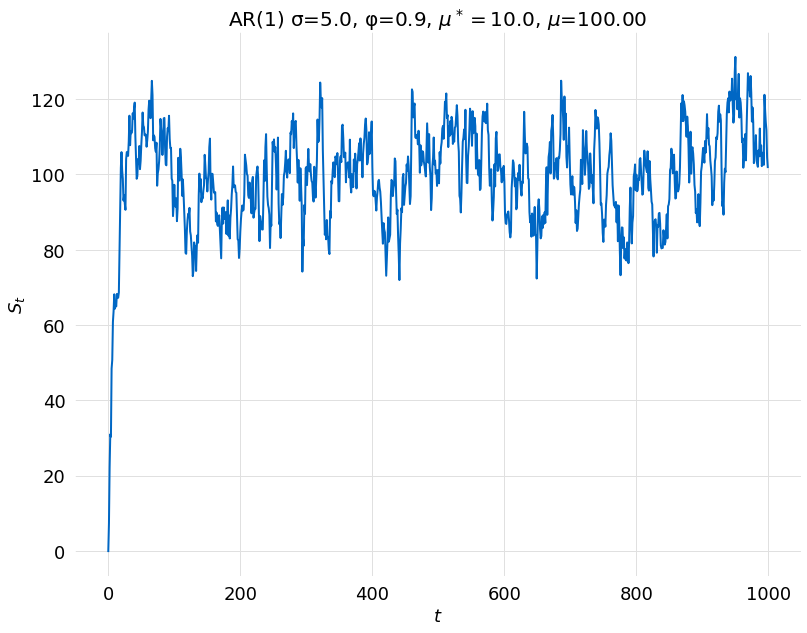

In [17]:
φ = 0.9
μ = 10.0
σ = 5.0
nsample = 1000
title = f"AR(1) σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}," + r" $\mu$=" + f"{format(μ/(1.0-φ), '4.2f')}"
df = arima.arp_offset([φ], μ, nsample, σ)
curve(df, plot_type=DataPlotType.TIME_SERIES, title=title)

In [18]:
results = arima.ar_offset_fit(df, 1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3066.140
Date:                Fri, 06 May 2022   AIC                           6138.279
Time:                        07:43:05   BIC                           6153.002
Sample:                             0   HQIC                          6143.875
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.8674      2.759     35.466      0.000      92.459     103.276
ar.L1          0.9431      0.005    196.140      0.000       0.934       0.952
sigma2        26.9021      1.152     23.358      0.000      24.645      29.159
===================================================================================
Ljung-Box (L1) (Q):                   0.98   Jarque-Bera (JB):                86.07
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.13
Prob(H) (two-sided):                  0.23   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
df.attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 2>,
  'Parameters': {'φ': [0.9], 'θ': [], 'σ': 5.0, 'μ': 10.0, 'γ': 0.0},
  'Description': 'ARIMA(1,0,0)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Estimates': {'AR(1)': {'Type': <EstType.AR: 'AR'>,
    'Const': [97.86740370190508, 2.759471828396302],
    'Parameters': [[0.9430699646798651, 0.004808151391251768]],
    'Sigma2': [26.90214978688939, 1.1517286473268262]}},
  'Tests': {}},
 'Date': '06/05/2022 07:43:05',
 'Name': 'ARMA-Simulation-8ab112b5-4357-48d9-b383-024aca260319'}

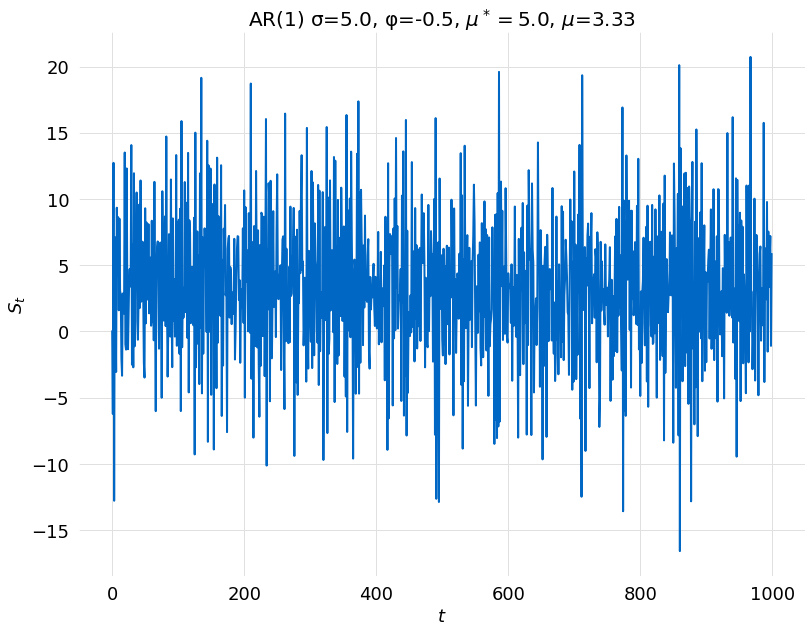

In [20]:
φ = -0.5
μ = 5.0
nsample = 1000
title = f"AR(1) σ={σ}, φ={φ}, " + r"$\mu^*=$" + f"{μ}," + r" $\mu$=" + f"{format(μ/(1.0-φ), '4.2f')}"
df = arima.arp_offset([φ], μ, nsample, σ)
curve(df, plot_type=DataPlotType.TIME_SERIES, title=title)

In [21]:
results = arima.ar_offset_fit(df, 1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2997.076
Date:                Fri, 06 May 2022   AIC                           6000.153
Time:                        07:43:05   BIC                           6014.876
Sample:                             0   HQIC                          6005.748
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3134      0.103     32.116      0.000       3.111       3.516
ar.L1         -0.4862      0.027    -18.261      0.000      -0.538      -0.434
sigma2        23.4766      1.042     22.534      0.000      21.435      25.518
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.34
Prob(Q):                              0.93   Prob(JB):                         0.84
Heteroskedasticity (H):               0.98   Skew:                            -0.04
Prob(H) (two-sided):                  0.89   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
df.attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 2>,
  'Parameters': {'φ': [-0.5], 'θ': [], 'σ': 5.0, 'μ': 5.0, 'γ': 0.0},
  'Description': 'ARIMA(1,0,0)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Estimates': {'AR(1)': {'Type': <EstType.AR: 'AR'>,
    'Const': [3.3133553079452462, 0.1031689327236672],
    'Parameters': [[-0.48623637587564317, 0.02662689304695052]],
    'Sigma2': [23.4765742389866, 1.041814700052035]}},
  'Tests': {}},
 'Date': '06/05/2022 07:43:05',
 'Name': 'ARMA-Simulation-390e6e40-20c5-46a2-81ef-cd52df54bee7'}